## Market Share

This notebook is to try plotting market share analysis.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy as scipy
import scipy.stats as stats

In [16]:
%%capture
%run create_distribution.ipynb
# This block runs all the code in the .ipynb and hides the output
# The 'magic function' has to be the first line

First, random sales data is generated for two imaginary companies. For this I'll use a function from my `create_distribution.ipynb` notebook.

In [5]:
# Two distributions are created here. Only the equation is different
low = 100
high = 500
sd = 40
by = 5

comp_1 = create_distrib("2*x+50", sd=sd, low=low, high=high, by=by, show=False, even=True)
print(comp_1.head(5))

comp_2 = create_distrib("1*x+50", sd=sd, low=low, high=high, by=by, show=False, even=True)
print(comp_2.head(5))

     x           y
0  100  262.515977
1  105  310.459529
2  110  255.220795
3  115  250.683805
4  120  268.830829
     x           y
0  100  102.135249
1  105  119.140312
2  110  202.832507
3  115  154.837175
4  120  113.230777


The two dataframes can be combined.

In [6]:
df = pd.merge(comp_1, comp_2, on='x')
df.columns = ['x','Company 1', 'Company 2']
print(df.head(5))

     x   Company 1   Company 2
0  100  262.515977  102.135249
1  105  310.459529  119.140312
2  110  255.220795  202.832507
3  115  250.683805  154.837175
4  120  268.830829  113.230777


Here the fake sales data for both companies are plotted.

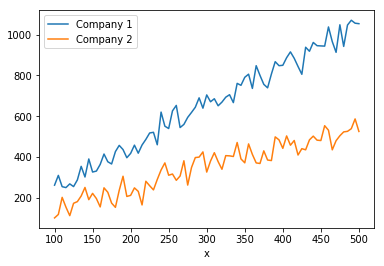

In [7]:
df.plot('x', ['Company 1','Company 2'])
plt.show()

Next, this is a plot of market share. Market share percentages add up to 100% so if only two companies are used, the lines will be symetrical around a midpoint.

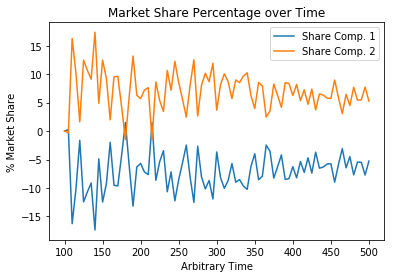

In [8]:
start1 = df['Company 1'][0]/(df['Company 1'][0]+df['Company 2'][0])
start2 = df['Company 2'][0]/(df['Company 1'][0]+df['Company 2'][0])
df = df.assign(s1=pd.Series((df['Company 1']/(df['Company 1']+df['Company 2'])-start1)*100))
df = df.assign(s2=pd.Series((df['Company 2']/(df['Company 1']+df['Company 2'])-start2)*100))
df.columns = ['x','Company 1','Company 2','Share Comp. 1','Share Comp. 2']
df.plot('x', ['Share Comp. 1','Share Comp. 2'])
plt.xlabel("Arbitrary Time")
plt.ylabel("% Market Share")
plt.title("Market Share Percentage over Time")
plt.show()

Let's create a function to do this now, for any number of companies.

In [30]:
# TODO: Use the x label values instead of the x column, and then generate the x column

def market_share_plot(dat, xlab=None, tick=5, trend=False, rval=False):
    import sys
    
    # Exits if the x tick labels are not of the same length as the data
    if xlab is not None:
        if dat.shape[0] is not len(xlab):
            print("Error: xlab length does not match the data")
            print(str(dat.shape[0]) + " != " + str(len(xlab)))
            sys.exit(1)
        
    dat = pd.DataFrame(dat)
    num_companies = dat.shape[1] - 1
    
    # Creates a list of companies
    company_names = []
    for column_name in dat.columns:
        if column_name is not "x":
            company_names.append(column_name)
        
    # Calculates the probabilities
    probs = pd.DataFrame()
    comp = 0
    for company in company_names:
        start = dat[company][0]/(dat.loc[0,dat.columns != 'x'].sum())*100
        prob_row = []
        
        # Finds the percentage for each value, minus the first value of the company
        for row in range(len(dat[company])):
            prob = (dat[company][row]/(dat.loc[row,dat.columns != 'x'].sum()))*100-start
            prob_row.append(prob)
        
        # Adds the probabilities to a new column in the dataframe
        probs = probs.assign(c=pd.Series(prob_row))
        probs = probs.rename(columns = { 'c' : company_names[comp]})
        comp += 1
    
    # Plots the probabilities over time
    probs.plot()
    plt.xlabel("Time Range")
    plt.ylabel("% Change")
    plt.title("Change in Market Share Over Time")
    plt.axhline(y=0, color="gray", linewidth=1, linestyle="--")
    
    # Add the x label text if given
    if xlab is not None:
        plt.xticks(np.arange(len(xlab), step=tick), xlab[0::tick], rotation=-75)
    
    # Add the trend lines
    if trend:
        r_values = { }
        xrange = np.arange(0,probs.shape[0],1)
        i = 0
        for p in probs:
            
            # Calculate and plot the equation of the trend line for each company
            slope, intercept, r, p, error = scipy.stats.linregress(xrange, probs[p])
            if rval:
                r_values[probs.columns[i]] = r
                
            line = slope * xrange + intercept
            plt.plot(xrange, line, color="black", linestyle="--", linewidth=1)
            i += 1
    plt.show()
    if trend and rval:
        return r_values

Let's test it now. Below, data is created for two companies, and then plotted.

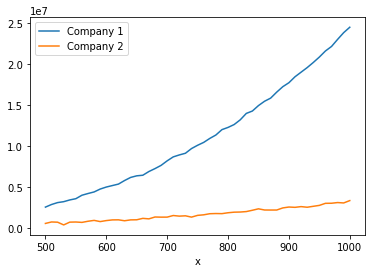

In [18]:
comp_1 = create_distrib("x**2*x/40-500000", sd=90000, low=500, high=1000, by=10, show=False, even=True)
comp_2 = create_distrib("x**1.5*x/10-x*10", sd=90000, low=500, high=1000, by=10, show=False, even=True)

df = pd.merge(comp_1, comp_2, on='x')
df.columns = ['x','Company 1', 'Company 2']

df.plot('x', ['Company 1','Company 2'])
plt.show()

Then with one line we can create the Market Share plot.

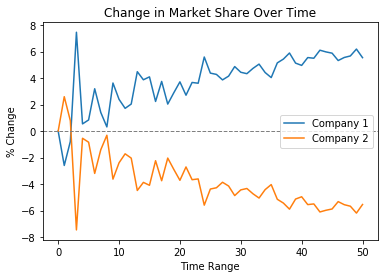

In [19]:
market_share_plot(df)

Now let's do the same thing, but for three different companies.

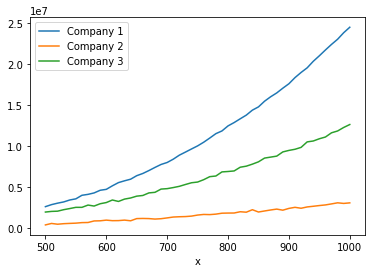

In [20]:
comp_1 = create_distrib("x**2*x/40-500000", sd=90000, low=500, high=1000, by=10, show=False, even=True)
comp_2 = create_distrib("x**1.5*x/10-x*10", sd=90000, low=500, high=1000, by=10, show=False, even=True)
comp_3 = create_distrib("x**1.7*x/10-x*10", sd=90000, low=500, high=1000, by=10, show=False, even=True)

df = pd.merge(comp_1, comp_2, on='x')
df = pd.merge(df, comp_3, on='x')
df.columns = ['x','Company 1','Company 2','Company 3']
df.plot('x', ['Company 1','Company 2', 'Company 3'])
plt.show()

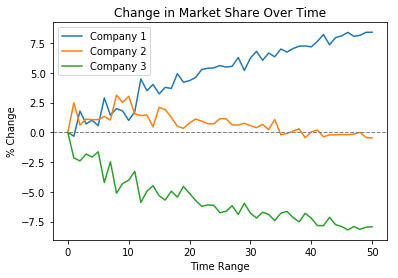

In [21]:
market_share_plot(df)

Let's test the x label feature of the `market_share_plot()` function, and the trend line feature of the function.

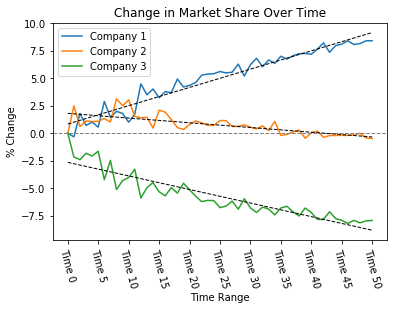

{'Company 1': 0.9670969300157622, 'Company 2': -0.7288026822177622, 'Company 3': -0.9159479621547408}


In [31]:
xlab = []
for t in range(51):
    xlab.append("Time " + str(t))
r_values = market_share_plot(df, xlab, trend=True, rval=True)
print(r_values)